In [342]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [343]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [323]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [344]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [345]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [371]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,0,...,0,0,2.102564,1.325000,1.025641,0.475000,0.950000,0.750000,0.400000,0.375000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,0,...,1,2,1.642857,0.785714,0.678571,0.285714,1.142857,1.250000,0.678571,0.535714
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,0,...,2,0,1.350000,1.125000,0.475000,0.625000,1.906250,0.875000,0.937500,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,1,0,0.800000,0.774194,0.400000,0.483871,1.290323,1.903226,0.580645,0.741935


## Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [372]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,2.102564,1.325000,0.950000,0.750000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,1.642857,0.785714,1.142857,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,1.350000,1.125000,1.906250,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.800000,0.774194,1.290323,1.903226


In [373]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9232, 6) (9232,)
3


In [374]:
x_train.shape[1]

6

In [375]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [376]:
model = create_model()
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_167 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_168 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_169 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_170 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_171 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_172 (Dense)            (None, 512)             

In [377]:
save = ModelCheckpoint('model_Foot_Win_All_Col.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [378]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9232 samples, validate on 2308 samples
Epoch 1/100
9180/9232 [============================>.] - ETA: 0s - loss: 14.4722 - accuracy: 0.4283
Epoch 00001: val_accuracy improved from -inf to 0.49437, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 3s 366us/sample - loss: 14.3974 - accuracy: 0.4286 - val_loss: 1.2233 - val_accuracy: 0.4944
Epoch 2/100
9000/9232 [============================>.] - ETA: 0s - loss: 1.1160 - accuracy: 0.4934
Epoch 00002: val_accuracy improved from 0.49437 to 0.53553, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 2s 219us/sample - loss: 1.1172 - accuracy: 0.4908 - val_loss: 1.0611 - val_accuracy: 0.5355
Epoch 3/100
8910/9232 [===========================>..] - ETA: 0s - loss: 1.0552 - accuracy: 0.5053
Epoch 00003: val_accuracy did not improve from 0.53553
9232/9232 [==============================] - 2s 203us/sample - loss: 1.0559 - accuracy: 0.5042 - val_loss: 1.0120 - val_acc

8910/9232 [===========================>..] - ETA: 0s - loss: 0.9841 - accuracy: 0.5294
Epoch 00028: val_accuracy did not improve from 0.54029
9232/9232 [==============================] - 2s 204us/sample - loss: 0.9832 - accuracy: 0.5304 - val_loss: 0.9755 - val_accuracy: 0.5360
Epoch 29/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9850 - accuracy: 0.5276 ETA: 0s - l
Epoch 00029: val_accuracy did not improve from 0.54029
9232/9232 [==============================] - 2s 195us/sample - loss: 0.9838 - accuracy: 0.5287 - val_loss: 0.9676 - val_accuracy: 0.5329
Epoch 30/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9838 - accuracy: 0.5300 ETA: 0s - loss: 0.9849 - accuracy: 0.52
Epoch 00030: val_accuracy did not improve from 0.54029
9232/9232 [==============================] - 2s 192us/sample - loss: 0.9836 - accuracy: 0.5301 - val_loss: 0.9668 - val_accuracy: 0.5390
Epoch 31/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9833 - ac

9090/9232 [============================>.] - ETA: 0s - loss: 0.9770 - accuracy: 0.5338
Epoch 00055: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 170us/sample - loss: 0.9773 - accuracy: 0.5336 - val_loss: 0.9717 - val_accuracy: 0.5386
Epoch 56/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9790 - accuracy: 0.5328 ETA: 0s -
Epoch 00056: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 183us/sample - loss: 0.9792 - accuracy: 0.5322 - val_loss: 0.9695 - val_accuracy: 0.5399
Epoch 57/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9761 - accuracy: 0.5338
Epoch 00057: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 194us/sample - loss: 0.9772 - accuracy: 0.5323 - val_loss: 0.9813 - val_accuracy: 0.5329
Epoch 58/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9804 - accuracy: 0.5342
Epoch 00058: val_accuracy d

Epoch 83/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9794 - accuracy: 0.5315
Epoch 00083: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 202us/sample - loss: 0.9797 - accuracy: 0.5315 - val_loss: 0.9781 - val_accuracy: 0.5373
Epoch 84/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9800 - accuracy: 0.5301
Epoch 00084: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 196us/sample - loss: 0.9794 - accuracy: 0.5305 - val_loss: 1.0031 - val_accuracy: 0.5373
Epoch 85/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9802 - accuracy: 0.5319
Epoch 00085: val_accuracy did not improve from 0.54159
9232/9232 [==============================] - 2s 206us/sample - loss: 0.9807 - accuracy: 0.5314 - val_loss: 0.9732 - val_accuracy: 0.5347
Epoch 86/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9778 - accuracy: 0.5357
Epoch 00086: val_accurac

Text(0, 0.5, 'Accuracy')

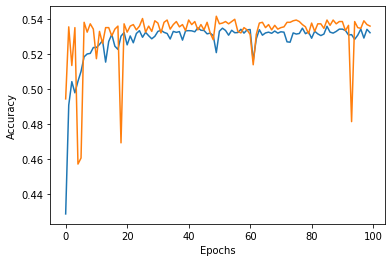

In [379]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction 

In [380]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0
unique[1]

array(['2020-06-30', 'FINISHED', 274432, 'Vitória SC', 'Vitória FC', 5543,
       5620, 3593, 3593, 1.6428571428571428, 0.7857142857142857,
       1.1428571428571428, 1.25], dtype=object)

In [381]:
model.load_weights("model_Foot_Win.h5")

## Avec les 6 variables

In [383]:
for i in unique:
    predictions_final = model.predict(np.array([[i[5],i[6],i[7],i[8],i[9],i[10]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

## Avec toute les variables

In [339]:
for i in unique:
    predictions_final = model.predict(np.array([[i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15],i[16],i[17],i[18],i[19]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [369]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df = pd.DataFrame(df)
df

AttributeError: 'DataFrame' object has no attribute 'id_match'

In [ ]:
d

In [ ]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')

In [ ]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [ ]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

In [ ]:
predictions1[0]

In [ ]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

In [ ]:
df = {'date':test_csv.date,'status':test_csv.status,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':np.around(equal,decimals=2),'prediction_homeTeam_victory':np.around(victory,decimals=2),'prediction_awayTeam_victory':np.around(loss,decimals=2),'match_state':results}

In [ ]:
finished = []
scheduled = []

In [ ]:
for i in d.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [ ]:
column_names = ["date", "status", "homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [ ]:
df_fini

In [ ]:
df_programme

In [ ]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

In [ ]:
df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')